In [3]:
import imageio as iio
import os
import matplotlib.pyplot as plt

In [4]:
source_path = 'Languages'
train_path = 'dataset/TrainData/'
val_path = 'dataset/ValidData/'
test_path = 'dataset/TestData/'

In [6]:
#sort data in testData, train data and valid data
for file in os.listdir(source_path):
    n = 0
    lang_name = file
    image_folder_path = source_path + '/' + lang_name + '/'+ lang_name + '_Spectrograms/'
    
    number_of_images = len(os.listdir(image_folder_path))
    train_num = int(0.8*number_of_images)
    val_num = int(0.1*number_of_images) + train_num
    
    for images_name in os.listdir(image_folder_path):
        
        img = iio.imread(image_folder_path + images_name)
        
        if n < train_num:
            folder_name = train_path + lang_name
    
        elif n >= train_num and n < val_num:
            folder_name = val_path + lang_name
        
        else:
            folder_name = test_path + lang_name
            
        if not os.path.isdir(folder_name):
            os.mkdir(folder_name)
        
        image_name = str(n) + '_' + lang_name + '.png'
        
        iio.imwrite(folder_name + '/' + image_name, img)
        n+=1

In [1]:
# Useful libraries
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision

import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

from torch.cuda import is_available

In [2]:
#Load datasets

path = 'dataset/'
trans = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

train_set = torchvision.datasets.ImageFolder(path +'TrainData', transform = trans)
valid_set = torchvision.datasets.ImageFolder(path +'ValidData', transform = trans)
test_set = torchvision.datasets.ImageFolder(path +'TestData', transform = trans)

train set size:  3892
validation set size:  485
test set size:  489


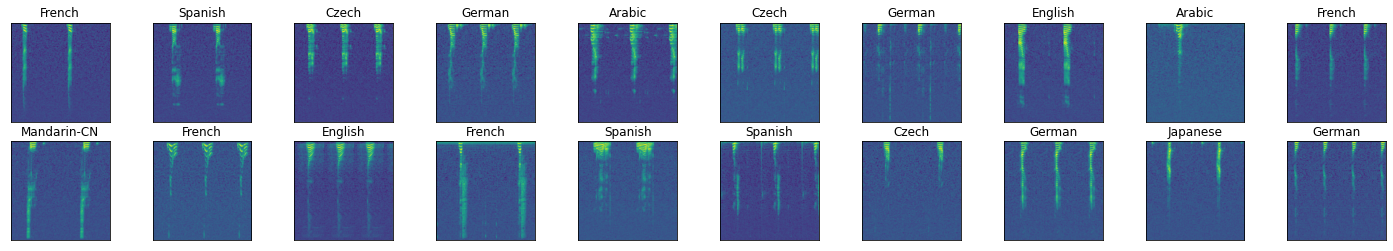

In [3]:
# dataloader testing
batch_size = 40
num_workers = 1
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle = True)

# show some images on one batch of training images
data_iter = iter(train_loader)
images, labels = data_iter.next()
images = images.numpy() # for display

classes = ['Arabic','Czech','English','French','German','Japanese','Mandarin-CN','Portuguese','Russian','Spanish']

fig = plt.figure(figsize = (25,4))
for i in np.arange(20):
  axis = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
  plt.imshow(np.transpose(images[i], (1,2,0)))
  axis.set_title(classes[labels[i]])

print("train set size: ", len(train_set))
print("validation set size: ", len(valid_set))
print("test set size: ", len(test_set))

In [2]:
import torchvision.models
resnet152 = torchvision.models.resnet.resnet152(pretrained=True)
alexNet = torchvision.models.alexnet(pretrained=True)

In [5]:
batch_size = 1
num_workers = 1
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,num_workers=num_workers,shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size,num_workers=num_workers,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,num_workers=num_workers,shuffle=True)


#save features to folder as tensors
def extract_features(data_loader, path, designation):
    n=0
    for img, label in data_loader:
        features = alexNet.features(img)
        features_tensor = torch.from_numpy(features.detach().numpy()) #to avoid tracking AlexNet weights
        folder_name = path + designation + str(classes[label])
        if not os.path.isdir(folder_name):
            os.mkdir(folder_name)
        torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
        n+=1

In [6]:
extract_features(train_loader, path, 'TrainFeatures/') #train
extract_features(valid_loader, path, 'ValidFeatures/') #validation
extract_features(test_loader, path, 'TestFeatures/') #test